# Price Estimation for Berlin Airbnb Data: Machine Learning&Deep Learning Class

https://www.kaggle.com/brittabettendorf/berlin-airbnb-data

## Data Fields

### Below you can find the full list of variables present in the data set

- id - ID of an offer
- listing_url - Link to the offer on Airbnb
- scrape_id - Scrapped id timestamp
- last_scrapped - Time of the last webscraping of the data
- name - Name of the offer
- summary - Quick overview of the property (text)
- space - Quick overview of the space features (text)
- description - Full description of the offer (text)
- experiences_offered - Additional experiences available in the offer (text)
- neighborhood_overview - Description of the neighborhood (text)
- notes - Message to customers (text)
- transit - Information about public transport in the neighborhood of the property (text)
- access - Way to access the property (text)
- interaction - Possibilities to interact with landlord (text)
- house_rules - Rules of the property (text)
- thumbnail_url - EMPTY
- medium_url - EMPTY
- picture_url - Link to the featured picture
- xl_picture_url - EMPTY
- host_id - ID of the landlord
- host_url - Link to the landlord Airbnb homepage
- host_name - Name of the landlord
- host_since - Date when landlord created the account
- host_location - Landlord place of living (text)
- host_about - Short description of the landlord (text)
- host_response_time - Average response time of the landlord (text)
- host_resposne_rate - Amount of message responded by the landlord
- host_acceptance_rate - The rate of guest accepted
- host_is_superhost - Is landlord a superhost? True/False (binary)
- host_thumbnail_url - Thumbnail picture of the host
- host_picture_url - Full picture of the host
- host_neighbourhood - Neighborhood of the landlord place (text)
- host_listings_count - Number of properties offered for rent by landlord
- host_total_listings_count - Number of properties offered for rent by host at total
- host verifications - Types of verifications provided by landlord (dict)
- host_has_profile_pic - Does landlord has a profile picture? True/False (binary)
- host_identity_verified - Does landlord verified his/her identity? True/False (binary)
- street - Street where is the property (text)
- neighbourhood - Name of the neighborhood of the property (text)
- neigbourhood_cleansed - Full name of the neighborhood (text)
- neighbourhood_group_cleansed - Neighborhood group name (text)
- city - City where the property is offered (text)
- state - State where the property is offered (text)
- zipcode - Zipcode of the property
- market - ?
- smart_location - Smart location search by Google (text)
- country_code - Country code (text)
- country - Country (text)
- latitude - Latitude
- longitude - Longtitude
- is_location_exact - Is location exact? True/False (binary)
- property_type - Type of the property (text)
- room_type - Type of the offered commodity (single room, entire place etc.) (text)
- accomodates - Accomodates
- bathrooms - Number of bathrooms
- beds - Number of beds
- bed_type - Type of bed offered (single,double,queen etc.) (text)
- amenities - Additional amenities offered (wifi,elevator etc.) (text)
- square_feet - Square feet
- price - Average price of the offer 
- weekly_price - Average weekly price of the offer (if host is offering some discount for weekly+ stays)
- monthly_price - Average monthly price of the offer (if host is offering some discount for monthly+ stays)
- security_deposit - Security deposit required to rent
- cleaning_fee - Cleaning fee
- guests_included - How many ppl can stay at the property (ex. Suitable for 2 ppl)
- extra_people - Fee for additional number of ppl staying in the property
- minimum_nights - Minimum number of nights to rent the property
- maximum_nights - Maximum number of nights to rent the property
- calendar_updated - How long time ago the landlord updated the property rent callendar
- has_availability - Is it available? True/False (binary)
- availability_30 - ?
- availability_60 - ?
- availability_90 - ?
- availability_365 - ?
- calendar_last_scraped - Date of the last scrapping the property calendar
- number_of_reviews - Number of reviews 
- first_review - When the first review was written
- last_review - When the last review was written
- review_scores_rating - Overall rating of the property
- review_scores_accuracy - Rating of the accuracy of the description to match offer
- review_scores_cleanlines - Rating of the cleanlines of the offer
- review_scores_checkin - Rating of the checking hospitality and time
- review_scores_communication - Rating of the communication with landlord
- review_scores_location - Rating of the neighboorhood and location of the property
- review_scores_value - Overall value of the property
- require_license - Have provided lincense?
- license - number of the license
- jurisdiction_names - ?
- instant_bookable - Is instant bookable? True/False (binary)
- is_business_travel_ready - Is business travel ready? True/False (binary)
- cancellation_policy - Cancellation policy terms (text)
- require_guest_profile_picture - Does landlord require guest profile picture? True/False (binary)
- require_guest_phone_verified - Does landlord require guest phone number been verified? True/False (binary)
- calculated_host_listings - How many listings landlord offered?
- reviews_per_month - Amount of reviews per month for the property

![](https://travelhero.pl/wp-content/uploads/2018/09/airbnb.png)

### Airbnb: An Overview
Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 81,000 cities and 191 countries worldwide. The company's name comes from "air mattress B&B.”

For hosts, participating in Airbnb is a way to earn some income from their property, but with the risk that the guest might do damage to it. For guests, the advantage can be relatively inexpensive accommodations, but with the risk that the property won't be as appealing as the listing made it seem.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import gc
import re
import xgboost as xgb
import warnings
from random import shuffle
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import neighbors
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from geopy.distance import great_circle
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

In [2]:
# Center all plots by CSS
from IPython.core.display import HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    margin:auto;
    }
.prompt 
    display:none;
}  
</style>
""")

## Data Import

In [3]:
pd.set_option("display.max_columns",30)
pd.set_option('display.float_format', lambda x: '%.2f' %x)
data = pd.read_csv('data/listings_summary.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 96 columns):
id                                  22552 non-null int64
listing_url                         22552 non-null object
scrape_id                           22552 non-null int64
last_scraped                        22552 non-null object
name                                22493 non-null object
summary                             21589 non-null object
space                               14020 non-null object
description                         22349 non-null object
experiences_offered                 22552 non-null object
neighborhood_overview               11540 non-null object
notes                               7215 non-null object
transit                             13036 non-null object
access                              10837 non-null object
interaction                         10406 non-null object
house_rules                         11449 non-null object
thumbnail_url           

In [5]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",...,9.00,10.00,10.00,10.00,9.00,t,NaN,nan,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,...,10.00,10.00,10.00,10.00,10.00,t,NaN,nan,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,We welcome FAMILIES and cater especially for y...,"We are 5 min walk away from the tram M2, whic...",The apartment will be entirely yours. We are c...,Feel free to ask any questions prior to bookin...,"It’s a non smoking flat, which likes to be tre...",...,9.00,9.00,9.00,10.00,9.00,t,NaN,nan,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",The flat is a strictly non-smoking facility! A...,The public transportation is excellent: Severa...,I do have a strictly non-smoker-flat. Keep th...,I'm working as a freelancing photographer. My ...,House-Rules and Information ..............(deu...,...,9.00,9.00,10.00,9.00,9.00,t,NaN,nan,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",I hope you enjoy your stay to the fullest! Ple...,Best access to other parts of the city via pub...,"The guests have access to the bathroom, a smal...",I am glad if I can give you advice or help as ...,Please take good care of everything during you...,...,10.00,10.00,10.00,10.00,9.00,t,NaN,nan,f,f,moderate,f,f,1,1.75


In [6]:
data.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,22552.00,22552.00,0.00,0.00,0.00,22552.00,0.00,22526.00,22526.00,22552.00,22552.00,22552.00,22520.00,22534.00,22512.00,...,22552.00,22552.00,22552.00,22552.00,22552.00,18163.00,18138.00,18141.00,18120.00,18134.00,18121.00,18117.00,0.00,22552.00,18638.00
mean,15715604.77,20181107122241.19,nan,nan,nan,54033548.02,nan,2.33,2.33,52.51,13.41,2.64,1.09,1.16,1.62,...,4.94,11.15,20.02,79.85,17.84,94.41,9.66,9.32,9.71,9.73,9.51,9.41,nan,1.92,1.14
std,8552068.64,4.81,nan,nan,nan,58162902.68,nan,19.95,19.95,0.03,0.06,1.51,0.33,0.65,1.17,...,8.68,17.52,28.35,119.37,36.77,7.64,0.74,1.03,0.70,0.69,0.76,0.84,nan,3.67,1.51
min,2015.00,20181107122246.00,nan,nan,nan,2217.00,nan,0.00,0.00,52.35,13.10,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,20.00,2.00,2.00,2.00,2.00,2.00,2.00,nan,1.00,0.01
25%,8065953.50,20181107122246.00,nan,nan,nan,9240002.25,nan,1.00,1.00,52.49,13.38,2.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,1.00,92.00,10.00,9.00,10.00,10.00,9.00,9.00,nan,1.00,0.18
50%,16866381.00,20181107122246.00,nan,nan,nan,31267110.00,nan,1.00,1.00,52.51,13.42,2.00,1.00,1.00,1.00,...,0.00,0.00,0.00,4.00,5.00,97.00,10.00,10.00,10.00,10.00,10.00,10.00,nan,1.00,0.54
75%,22583930.75,20181107122246.00,nan,nan,nan,80675177.00,nan,2.00,2.00,52.53,13.44,3.00,1.00,1.00,2.00,...,6.00,18.00,36.00,129.00,16.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,nan,1.00,1.50
max,29867352.00,20181107122246.00,nan,nan,nan,224508134.00,nan,1676.00,1676.00,52.65,13.76,16.00,8.50,12.00,22.00,...,30.00,60.00,90.00,365.00,498.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,nan,45.00,36.67


In our DataSet we have roughly 225 552 observations and 99 variables. Significant amount of them are NA or not needed (like for example photo thumbnails), and at the first glimpse we can see variables that will need to be removed in future due to the fact that their can be strongly correlated with eachother - as far as our domain knowledge from the previous projects tells us.

## Explanatory Data Analysis (EDA)

In this part we will perform some Data Engineering, Visualisations etc. to make our variables more efficient for future purposes

![](https://www.gre.ac.uk/__data/assets/image/0011/1191953/analysis-banner.jpg)

### Feature Engineering

First we will delete create list with the names of columns we want to delete from our data set, either due to the inconsistency, lack of information or they are just not needed.
 - We have divided our useless columns to four categories
     - descriptive columns: which we do not need because we do not want to perform any text analysis, and we belive description of the property doesnt affect it market price. Also some descriptions are in German...
     - empty columns: columns which are mostly in 100% NA
     - inconsistent columns: columns with data that are redundant, or not needed for our analysis i.e pictures thumbnail urls etc.
     - doubtful columns: columns which does not provide any reasonable information, or their origin are doubtful and are not easy to describe what they are

As we decided not introducing here any form of text mining, we will also get rid of all description of properties etc - because we think it is strongly subjective topic which depends mostly on the landlord abilities to write nice text

In [7]:
desc_cols = ["name","summary","space","neighborhood_overview","notes","transit","access","interaction","house_rules","host_about","host_location","host_neighbourhood","neighbourhood"]
empty_cols = ["experiences_offered","host_acceptance_rate","license","jurisdiction_names"]
inconsistent_cols = ["id","listing_url","scrape_id","last_scraped","thumbnail_url","medium_url","picture_url","xl_picture_url","host_id","host_url","host_name","host_since","host_thumbnail_url","host_picture_url","street","city","state","zipcode","market","country_code","country","square_feet"]
doubtful_cols = ["host_listings_count","host_total_listings_count","host_verifications","smart_location","is_location_exact","weekly_price","monthly_price","calendar_updated","has_availability","availability_30","availability_60","availability_90","availability_365","calendar_last_scraped","first_review","last_review","requires_license","calculated_host_listings_count"]

Below we prepared list of columns that need to be converted to binary from text, because we believe they can be usefull in further analysis of the price

In [8]:
#to_binary_cols = ["summary","space","description","neighborhood_overview","notes","transit","house_rules","picture_url"]

We have also to do some cleaning to the data itself, i.e change some NULL's to 0 and conversely:
- security_deposit: change null to 0
- cleaning_fee: change null to 0
- cancellation_policy: shorten text to; flexible, moderate,strict
- host_response_time: shorten text to: hours, day, NA
- host_is_superhost: mark; t->1 f->0
- host_has_profile_pic: mark; t->1 f->0
- host_identity_verified: mark; t->1 f->0
- instant_bookable: mark; t->1 f->0
- is_business_travel_ready: mark; t->1 f->0
- require_guest_profile_picture: mark; t->1 f->0
- require_guest_phone_verification: mark; t->1 f->0

In [9]:
#cleaning amenities
from collections import Counter
results = Counter()
data['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

data.amenities = data['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')

In [10]:
#cleaning prices
data.price = data['price'].str.replace("$",'')
data.price = data['price'].str.replace(",",'')
data.security_deposit = data['security_deposit'].str.replace("$",'')
data.security_deposit = data['security_deposit'].str.replace(",",'')
data.cleaning_fee = data['cleaning_fee'].str.replace("$",'')
data.cleaning_fee = data['cleaning_fee'].str.replace(",",'')
data.extra_people = data['extra_people'].str.replace("$",'')
data.extra_people = data['extra_people'].str.replace(",",'')

In [11]:
#filling NA's with 0 where relevant
data.security_deposit=data.security_deposit.fillna("0")
data.cleaning_fee = data.cleaning_fee.fillna("0")
data.extra_people = data.cleaning_fee.fillna("0")
data = data.dropna(subset=['host_is_superhost', 'host_has_profile_pic','host_identity_verified'])

In [12]:
#creating list with colnames for converting from t to 1 and f to 0
convert_cols = ["host_is_superhost","host_has_profile_pic","host_identity_verified","instant_bookable","is_business_travel_ready","require_guest_profile_picture","require_guest_phone_verification"]

In [13]:
#looping over rows and checking statement: IF t then -> 1 , ELSE 0
mapa = {'t': True, 'f': False}
for i in convert_cols:
    data[i]= data[i].map(mapa)

In [14]:
#creating only 5 groups for Cancellation Policy
data.cancellation_policy = pd.np.where(data.cancellation_policy.str.contains("flexible"),"flexible",
                        pd.np.where(data.cancellation_policy.str.contains("moderate"),"moderate",
                        pd.np.where(data.cancellation_policy.str.contains("super_strict_60"),"extremaly strict",
                        pd.np.where(data.cancellation_policy.str.contains("super_strict_30"),"very strict",
                       pd.np.where(data.cancellation_policy.str.contains("strict_14"),"strict","NA")))))

data.host_response_time = pd.np.where(data.host_response_time.str.contains("within an hour"),"less than hour",
                        pd.np.where(data.host_response_time.str.contains("within a few hours"),"few hours",
                        pd.np.where(data.host_response_time.str.contains("within a day"),"day",
                        pd.np.where(data.host_response_time.str.contains(""),"NA",
                       pd.np.where(data.host_response_time.str.contains("N/A"),"NA","NA")))))

In [15]:
#lets finally drop unneccessary columns
drop_list = desc_cols + empty_cols + inconsistent_cols + doubtful_cols
data = data.drop(drop_list,axis=1)

In [16]:
#Final step is to make response rate normal number and to convert all objects to floats
data.host_response_rate = data['host_response_rate'].str.replace('%','')\
               .str.replace('NaN', 'NA')
data.host_response_rate = data.host_response_rate.astype(float)
data.host_response_rate = data.host_response_rate.div(100)

#converting to floats
to_float = ['longitude','latitude','price','security_deposit','cleaning_fee','extra_people']

for i in to_float:
    data[i] = data[i].astype(float)

As we found it helpful in some kaggle kernel we will use their work to create new colum:
   - size
   - distance
    
These one will help us deal with our missing data in the column square_feet. 
Basically we will make use of extraction numbers from property overview to estimate the size of the property.

In [17]:
data['size'] = data['description'].str.extract('(\d{2,3}\s?[smSM])', expand=True)
data['size'] = data['size'].str.replace("\D", "")

# change datatype of size into float
data['size'] = data['size'].astype(float)
data.drop(['description'], axis=1, inplace=True)

In [18]:
def distance_to_mid(lat, lon):
    berlin_centre = (52.5027778, 13.404166666666667)
    accommodation = (lat, lon)
    return great_circle(berlin_centre, accommodation).km

data['distance'] = data.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)

In [19]:
for i in data.columns:
    print(i,":",data[i].isna().sum()/len(data[i]))

host_response_time : 0.0
host_response_rate : 0.5712953919914765
host_is_superhost : 0.0
host_has_profile_pic : 0.0
host_identity_verified : 0.0
neighbourhood_cleansed : 0.0
neighbourhood_group_cleansed : 0.0
latitude : 0.0
longitude : 0.0
property_type : 0.0
room_type : 0.0
accommodates : 0.0
bathrooms : 0.0014205806623457339
bedrooms : 0.0007990766225694753
beds : 0.0017757258279321672
bed_type : 0.0
amenities : 0.0
price : 0.0
security_deposit : 0.0
cleaning_fee : 0.0
guests_included : 0.0
extra_people : 0.0
minimum_nights : 0.0
maximum_nights : 0.0
number_of_reviews : 0.0
review_scores_rating : 0.1942644055757791
review_scores_accuracy : 0.19537423421823671
review_scores_cleanliness : 0.1952410547811418
review_scores_checkin : 0.1961733108408062
review_scores_communication : 0.19555180680102993
review_scores_location : 0.19612891769510787
review_scores_value : 0.1963064902779011
instant_bookable : 0.0
is_business_travel_ready : 0.0
cancellation_policy : 0.0
require_guest_profile_pi

## Plotting

![](https://images.unsplash.com/photo-1434626881859-194d67b2b86f?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1053&q=80)

We plotted as much as possible to see the data in visual form, mostly because we are visual learners and it's easier to interpret for us than just standard table

We will also try not to plot everything, only those variables that we think are crucial to plot

### Amenities

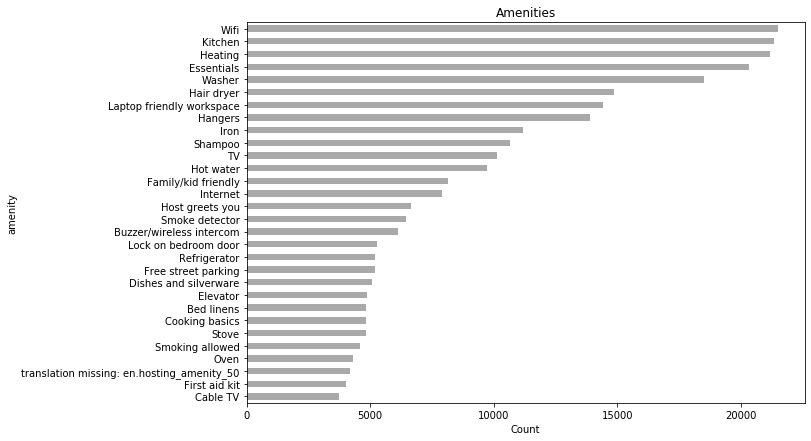

In [20]:
sub_df = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,7), legend=False, color='darkgrey',
                                                      title='Amenities')
plt.xlabel('Count');

These are top 30 amenities that are present in properties offered in Berlin

### Price

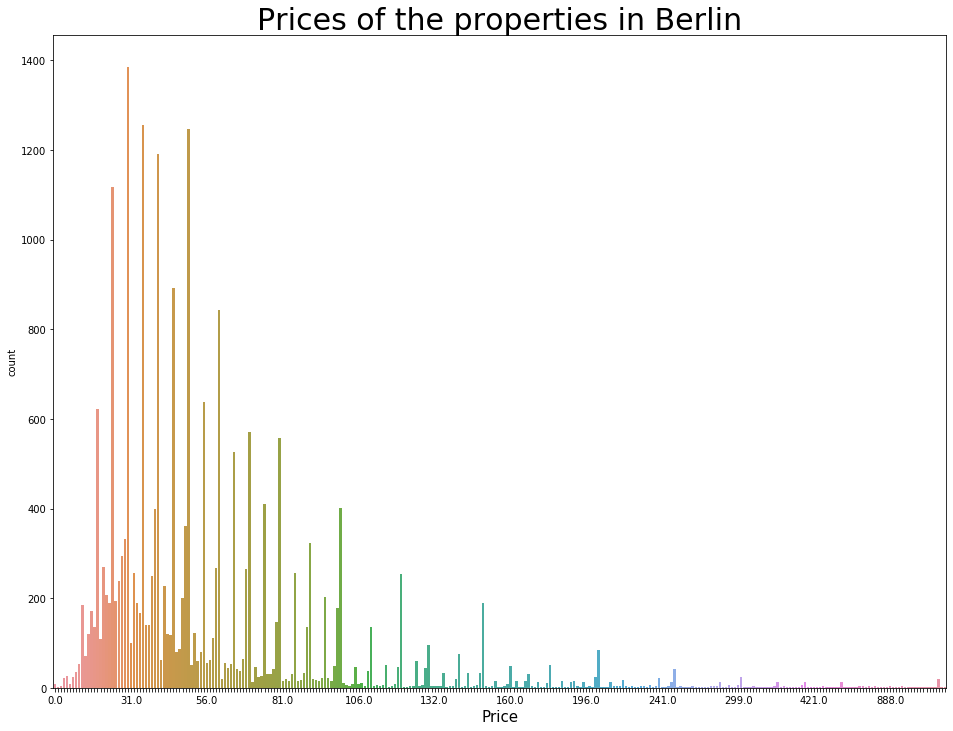

In [21]:
plt.figure(figsize=(16,12))
plot = sns.countplot(data['price'].sort_values())
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 25 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.title("Prices of the properties in Berlin",fontsize=30)
plot.set_xlabel("Price",fontsize=15)
plot.tick_params(labelsize=10)
plt.show()

 - We can see here that the price range for most properties is around 30 per night, but we can see outliers which shows that some properties price is EVEN 1000 per night

 - Lets drop then the outliers (price>250) for further analysis

In [22]:
data = data.query("price>5 & price < 300")

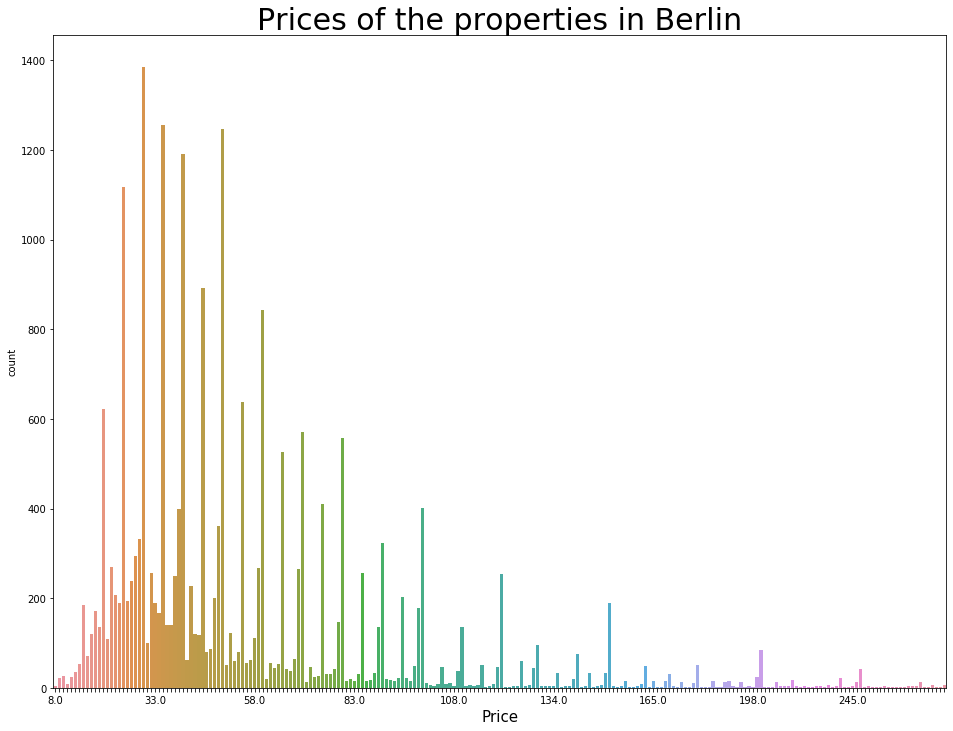

In [23]:
plt.figure(figsize=(16,12))
plot = sns.countplot(data['price'].sort_values())
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 25 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.title("Prices of the properties in Berlin",fontsize=30)
plot.set_xlabel("Price",fontsize=15)
plot.tick_params(labelsize=10)
plt.show()

Now it looks way better!

### Size of the properties

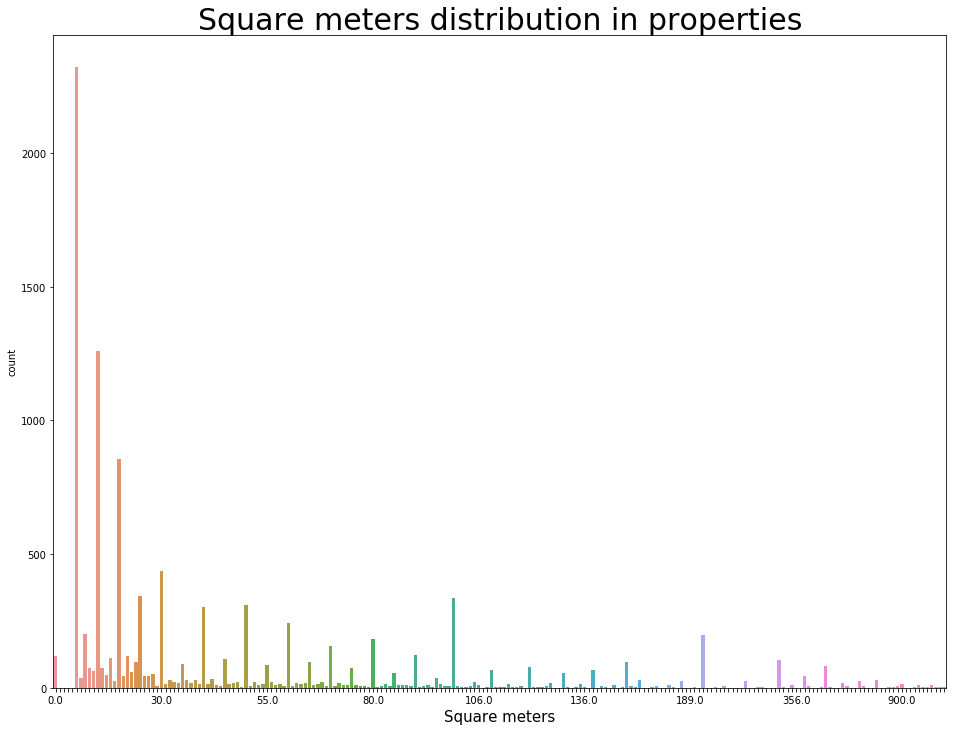

In [24]:
plt.figure(figsize=(16,12))
plot = sns.countplot(data['size'])
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 25 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.title("Square meters distribution in properties",fontsize=30)
plot.set_xlabel("Square meters",fontsize=15)
plot.tick_params(labelsize=10)
plt.show()

In [25]:
data = data.query("size>0 and size<200")

### Description of the Host

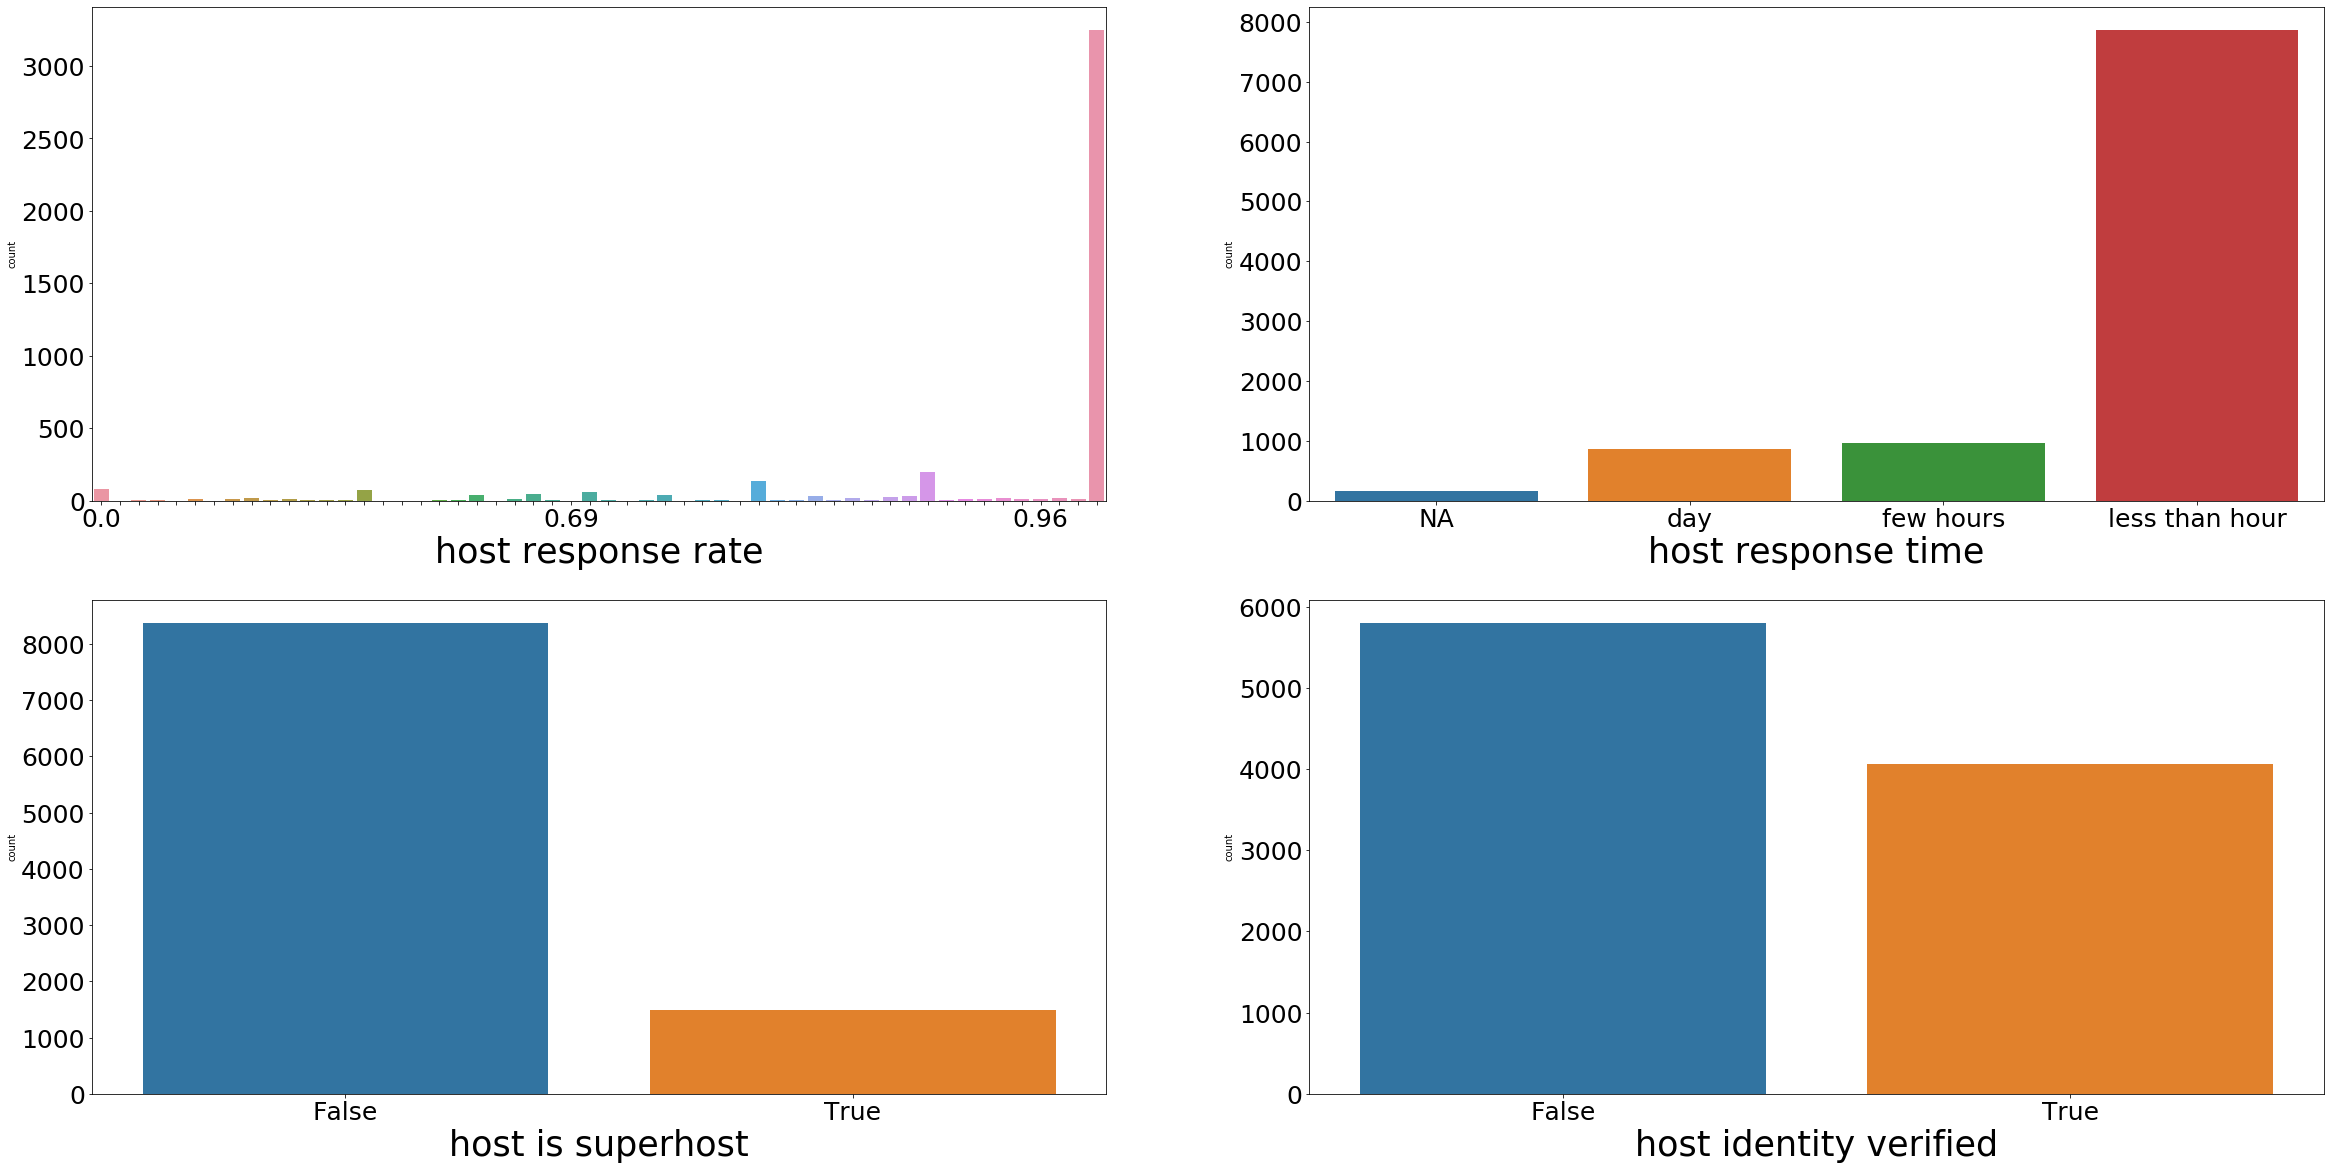

In [26]:
fig, ax = plt.subplots(2,2,figsize=(40,20))
plot1 = sns.countplot(data['host_response_rate'].sort_values(), ax=ax[0][0])
plot2 = sns.countplot(data['host_response_time'].sort_values(), ax=ax[0][1])
plot3 = sns.countplot(data['host_is_superhost'].sort_values(), ax=ax[1][0])
plot4 = sns.countplot(data['host_identity_verified'].sort_values(), ax=ax[1][1])
for ind, label in enumerate(plot1.get_xticklabels()):
    if ind % 25 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plot1.set_xlabel("host response rate",fontsize=35)
plot1.tick_params(labelsize=25)
plot2.set_xlabel("host response time",fontsize=35)
plot2.tick_params(labelsize=25)
plot3.set_xlabel("host is superhost",fontsize=35)
plot3.tick_params(labelsize=25)
plot4.set_xlabel("host identity verified",fontsize=35)
plot4.tick_params(labelsize=25)
plt.show()

 - We can see from here that hosts response rate overall is very high, and majority of them replies within hours, however we need to delete these rows which are 0 for the sake of clarity

- Yet majority of host are not superhost and there are more unverified than verified hosts

In [27]:
data.drop(['host_response_rate'], axis=1, inplace=True)

### Price with respect to longitude and latitude

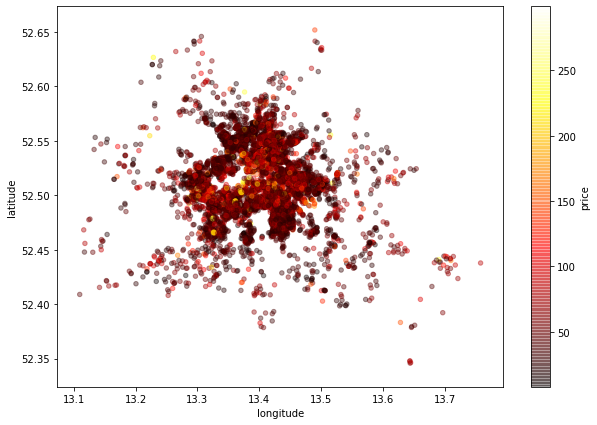

In [28]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7), 
        c="price", cmap="hot", colorbar=True, sharex=False);

### Lets just take a quick glimpse at all variables

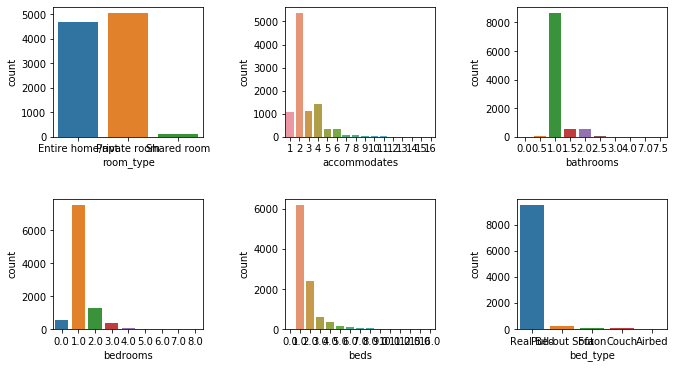

In [29]:
fig = plt.figure(figsize=(10,40))

for i, col in enumerate(data.columns[9:15]):
    ax = fig.add_subplot(15, 3, i + 1)
    if len(data[col].unique()) > 20:
        sns.distplot(data[col])
    else:
        sns.countplot(data[col])

fig.tight_layout(pad=3)

- We have to deal somehow with outliers - so as we do in everycase, we will just cut them
    - bedrooms: above 4
    - accomodates: bin everything above 7 as 7
    - bathrooms: above 2
    - beds: bin everything above 5 as 5

In [30]:
data = data.query("accommodates<7")
data = data.query("beds>0 & beds<5")
data = data.query("bathrooms>0 & bathrooms<3")
data = data.query("bedrooms<4")

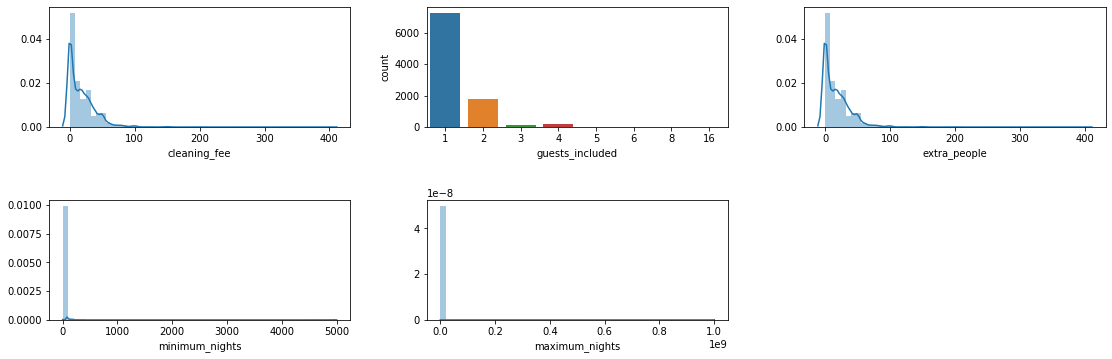

In [31]:
fig = plt.figure(figsize=(16,40))

for i, col in enumerate(data.columns[18:23]):
    ax = fig.add_subplot(15, 3, i + 1)
    if len(data[col].unique()) > 20:
        sns.distplot(data[col])
    else:
        sns.countplot(data[col])

fig.tight_layout(pad=3)

- We can see that variable maximum_night is useless lets remove it
- Additionaly we will cut the outliers in:
    - cleaning_fee: above 60
    - guests_included: above 4
    - extra_people: above 40
    - minimum_nights: above 30
    - number_of_reviews: above 60

In [32]:
data = data.query("cleaning_fee<60")
data = data.query("security_deposit<600")
data = data.query("guests_included<5")
data = data.query("extra_people<40")
data = data.query("number_of_reviews<50")
data.drop(['maximum_nights'], axis=1, inplace=True)
data.drop(['minimum_nights'], axis=1, inplace=True)

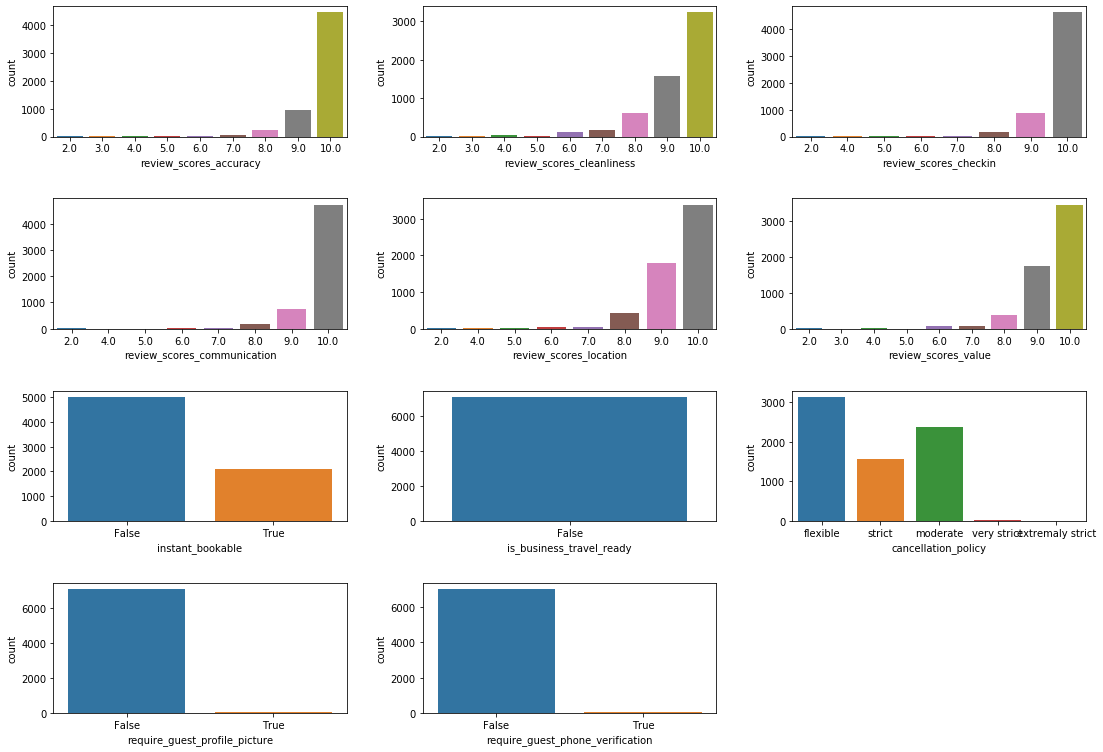

In [33]:
fig = plt.figure(figsize=(16,40))

for i, col in enumerate(data.columns[23:34]):
    ax = fig.add_subplot(15, 3, i + 1)
    if len(data[col].unique()) > 20:
        sns.distplot(data[col])
    else:
        sns.countplot(data[col])

fig.tight_layout(pad=3)

- We can see that variable is_business_travel_ready is not needed
- We will also cut some outliers from:
    - review_scores_value: below 5 and everything less than 7 as 7
    - review_scores_checkin: below 5 and everything less than 7 as 7
    - review_scores_cleanliness: below 5
    - review_scores_communication: below 7 and everything less than 8 as 8
    - review_scores_location: everything below 7 as 7
    - review_scores_accuracy: everything below 7 as 7

In [34]:
data.drop(['is_business_travel_ready'], axis=1, inplace=True)
data.drop(['require_guest_profile_picture'], axis=1, inplace=True)
data.drop(['require_guest_phone_verification'], axis=1, inplace=True)
data = data.query('review_scores_accuracy>7')
data = data.query("review_scores_cleanliness>5")
data = data.query('review_scores_checkin>7')
data = data.query('review_scores_communication>7')
data = data.query('review_scores_location>6')
data = data.query('review_scores_value>6')
data = data.query("reviews_per_month<4")
data = data.query('distance<15')

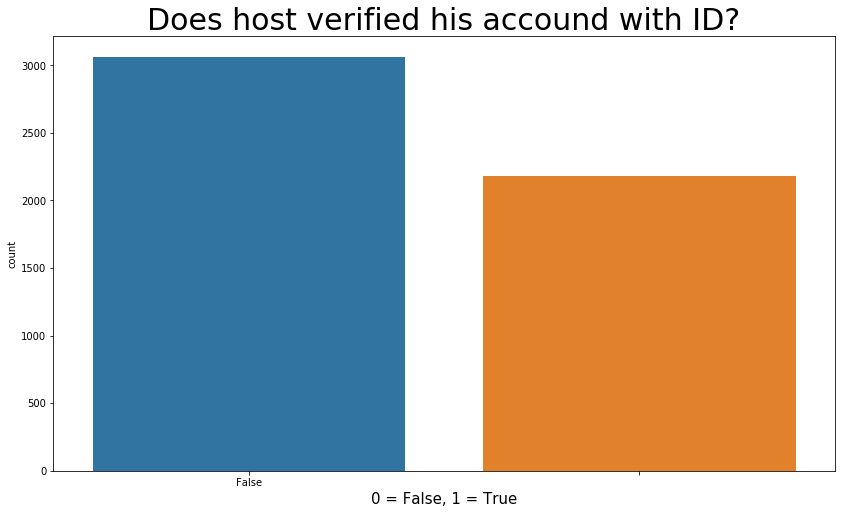

In [35]:
plt.figure(figsize=(14,8))
plot = sns.countplot(data['host_identity_verified'])
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 25 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.title("Does host verified his accound with ID?",fontsize=30)
plot.set_xlabel("0 = False, 1 = True",fontsize=15)
plot.tick_params(labelsize=10)
plt.show()

## Investigating Correlations among variables

- Here we will investigate correlation among our variables
- We will also make finall feature selection to minimize our variable set (we have 41 of them!!!)

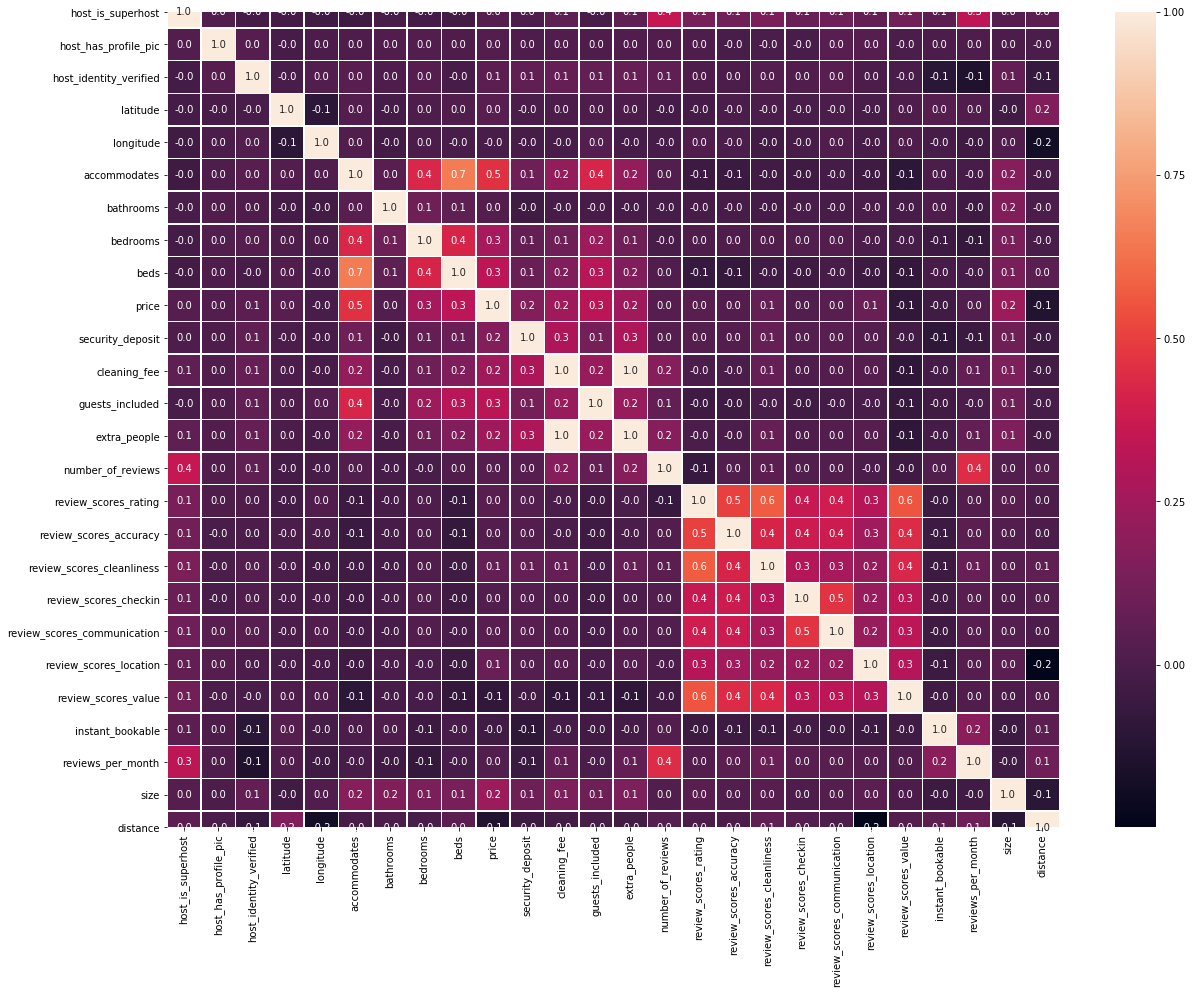

In [36]:
f,ax = plt.subplots(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

As we could predict, we have some strongly correlated variables:
  - accomodates - beds (0.7)
  - reviews_score_rating - reviews_score_accuracy (0.6)
  - reviews_score_rating - reviews_score_cleanliness (0.6)
  - reviews_score_rating - reviews_score_value (0.6)
  - is_space - is_neighborhood_overview (0.6)
  - is_space - is_transit (0.7)
  - is_neigborhood_overview - is_transit (0.7)

However we wont delete it because we will estimate kind of models that deal with it well

We will also take a look at our variable basket and delete some corresponding to eachother, or just these ones that we think are too obvious or not entirely necessary

We will get rid of:
   - host_has_profile_pic: we do not think that profile picture affects price anyhow
   - neighbourhood_group_cleansed: because it is more general than neighbourhood_cleansed
   - latitude
   - longitude
   - property_type: because more important info is in room_type
   - amenities: they are too many
   - minimum_nights: not consistent - it is obvious that for most it will be 0/1
   - is_note: is basically the same as is_house_rules
   - review_scores_value: bigger category for other review_scores variables
   - host_identity_verified: weird variable, because all host should be verified to put an offer

In [37]:
data = data.drop(columns = ['neighbourhood_group_cleansed','neighbourhood_cleansed','host_has_profile_pic','latitude','longitude','amenities','property_type'])

## Model Estimation

In this part we will try to estimate our models: XGBoost, NeuralNetworks.

What we've done here:

- Feature selection to fit our model best
- Hyperparameters tunning
- Base our conclusions on Precision and Recall in addition to Accuracy
- Time Efficiency testing for each algorithm

Lets begin!

![](https://cdn.lynda.com/course/645050/645050-636700308369503992-16x9.jpg)

In [38]:
data.describe()

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,size,distance
count,5247.00,5247.00,5247.00,5247.00,5247.00,5247.00,5247.00,5247.00,5247.00,5247.00,5247.00,5247.00,5247.00,5247.00,5247.00,5247.00,5247.00,5247.00,5247.00,5247.00
mean,2.32,1.06,1.06,1.36,47.04,63.49,11.14,1.21,11.14,10.22,95.53,9.76,9.37,9.80,9.82,9.52,9.55,0.75,32.39,4.65
std,0.96,0.22,0.43,0.64,26.35,118.70,11.57,0.49,11.57,10.83,5.64,0.49,0.87,0.46,0.44,0.66,0.63,0.84,31.23,2.27
min,1.00,0.50,0.00,1.00,8.00,0.00,0.00,1.00,0.00,1.00,60.00,8.00,6.00,8.00,8.00,7.00,7.00,0.02,5.00,0.20
25%,2.00,1.00,1.00,1.00,30.00,0.00,0.00,1.00,0.00,3.00,93.00,10.00,9.00,10.00,10.00,9.00,9.00,0.16,10.00,3.23
50%,2.00,1.00,1.00,1.00,40.00,0.00,10.00,1.00,10.00,6.00,97.00,10.00,10.00,10.00,10.00,10.00,10.00,0.42,20.00,4.28
75%,3.00,1.00,1.00,2.00,58.50,100.00,20.00,1.00,20.00,14.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,1.00,40.00,5.78
max,6.00,2.50,3.00,4.00,280.00,550.00,39.00,4.00,39.00,49.00,100.00,10.00,10.00,10.00,10.00,10.00,10.00,3.98,194.00,14.87


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5247 entries, 1 to 22398
Data columns (total 27 columns):
host_response_time             5247 non-null object
host_is_superhost              5247 non-null bool
host_identity_verified         5247 non-null bool
room_type                      5247 non-null object
accommodates                   5247 non-null int64
bathrooms                      5247 non-null float64
bedrooms                       5247 non-null float64
beds                           5247 non-null float64
bed_type                       5247 non-null object
price                          5247 non-null float64
security_deposit               5247 non-null float64
cleaning_fee                   5247 non-null float64
guests_included                5247 non-null int64
extra_people                   5247 non-null float64
number_of_reviews              5247 non-null int64
review_scores_rating           5247 non-null float64
review_scores_accuracy         5247 non-null float64
review

In [82]:
data_copy = data.copy().reset_index(drop=True)
data_copy2 = data.copy().reset_index(drop=True)

At the beginning let's convert all string columns into categorical ones:

In [83]:
for col in ['host_response_time', 'room_type', 'bed_type', 
            'cancellation_policy']:
    
    data_copy[col] = data_copy[col].astype('category')

At this point we will define our target variable and features basket

In [84]:
#Lets create dummies for categorical variables
numerical_features = data_copy.select_dtypes(include=['float64', 'int64', 'bool']).copy()

categorical_features = data_copy.select_dtypes(include=['category']).copy()
categorical_features = pd.get_dummies(categorical_features)

In [85]:
data_copy = pd.concat([numerical_features, categorical_features], axis=1)
data_copy = data_copy.sample(frac=1).reset_index(drop=True)
features = data_copy.drop(["price"], axis=1)

### Splitting Data Set

In [89]:
X_train, X_test, y_train, y_test = train_test_split(features, data_copy['price'], test_size=0.3)

### XGBoost

#### Fitting sample XGBoost model

In [90]:
xgboost = xgb.XGBRegressor()

In [91]:
# train
xgboost.fit(X_train, y_train)

# predict
y_pred_train = xgboost.predict(X_train)
y_pred_test = xgboost.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {round(RMSE, 4)}")

r2 = r2_score(y_test, y_pred_test)
print(f"r2: {round(r2, 4)}")

[18:58:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 20.8885
r2: 0.3892


Now lets check importance of the variables

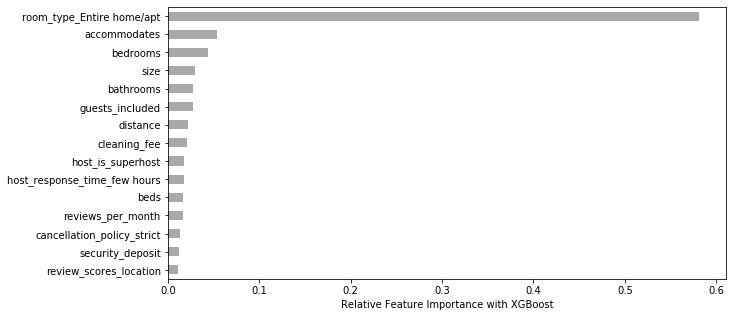

In [92]:
feat_importances = pd.Series(xgboost.feature_importances_, index=features.columns)
feat_importances.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with XGBoost');

#### 5 Fold Cross Validation

Without hyperparameter tuning

In [93]:
xg_train = xgb.DMatrix(data=X_train, label=y_train)
params = {'colsample_bytree':0.6, 'gamma':0.2, 'learning_rate':0.05, 'max_depth':6}

cv_results = xgb.cv(dtrain=xg_train, params=params, nfold=3,
                    num_boost_round=200, early_stopping_rounds=10, 
                    metrics="rmse", as_pandas=True)

In [94]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,51.25,0.47,51.28,1.00
1,49.10,0.45,49.18,1.03
2,47.06,0.44,47.21,1.03
3,45.12,0.43,45.35,1.05
4,43.32,0.41,43.62,1.09
